In [1]:
# Path setup / Imports
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [2]:
from rdkit.Chem import Draw, Mol, rdDepictor
from utils import HELMConverter, draw_mol

# Monomer libraries (supports xml format used in ChEMBL, and json format used in Pistoia Alliance)
lib_files = [
    "chembl_35_monomer_library.xml",
    "chembl_35_monomer_library_diff.xml",
    "HELMCoreLibrary.json",
    "monomerLib2.0.json"
]

# Initialize helm converter and load monomer libraries
converter = HELMConverter().load(*[repo_root + f"data/helm/library/{name}" for name in lib_files])

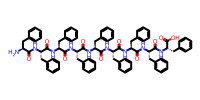

In [ ]:
# Convert HELM string into an RDKit Mol object

helm = "PEPTIDE1{F.F.F.F.F.F.F.F.F}$$$$" # Simple chain
# helm = "PEPTIDE1{[dP].G}|PEPTIDE2{Y.[dOrn].[1-Nal]}$PEPTIDE2,PEPTIDE1,3:R2-1:R1|PEPTIDE2,PEPTIDE1,2:R3-2:R2$$$" # Multiple polymers
# helm = "PEPTIDE1{[dC].[dS].N.[dL].S.[dalloT].[dC].V.L.S.A.Y.W.R.N.L.N.N.F.H.R.F.S.G.M.G.F.G.[dP].Q.T.P}$PEPTIDE1,PEPTIDE1,7:R3-1:R3$$$" # Lasso
# helm = "RNA1{R(C)P.R(T)P.R(C)P.R(C)P.R(A)P.R(A)P.R(C)P.R(A)P.R(T)P.R(C)P.R(A)P.R(A)P.R(G)P.R(G)P}$$$$" # RNA
# helm = "PEPTIDE1{A.[[*]N[C@@H](C=O)C([*])=O |$_R1;;;;;;_R2;$|].C}$$$$" # Inline (CX)
# helm = "PEPTIDE1{F.[[*:1]N[C@@H](Cc1ccccc1)C([*:2])=O].C}$$$$" # Inline (atom mapped)

mol = converter.convert(helm)
draw_mol(mol, height=100, width=200)

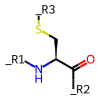

In [4]:
# Check a single monomer in the loaded libraries
mol = converter.check_monomer("C", "PEPTIDE")
draw_mol(mol, height=100, width=100)